<a href="https://colab.research.google.com/github/lamass/Biz_var_projects/blob/main/Churn_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python program that predicts customer churn

In [1]:
# load libraries
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 


In [2]:
#load the dataset
from google.colab import files
uploaded = files.upload()


Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


In [6]:
df =pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv') 
df.sample(7)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
463,3811-VBYBZ,Male,0,No,No,7,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.80,673.25,Yes
6468,2599-CZABP,Male,0,Yes,No,14,Yes,No,DSL,No,...,No,No,No,No,One year,No,Electronic check,44.60,641.25,No
203,7018-WBJNK,Male,0,No,Yes,13,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),78.30,1033.95,No
6978,6439-PKTRR,Female,0,Yes,Yes,70,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Electronic check,80.70,5617.95,No
5937,5383-MMTWC,Female,1,Yes,No,8,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.00,613.4,Yes
5225,5376-PCKNB,Male,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),104.45,7459,No
6584,6340-DACFT,Female,0,Yes,Yes,50,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),20.55,1070.25,No


In [7]:
# show numer of columns and rows
df.shape

(7043, 21)

In [8]:
(df.dtypes == 'int64').sum()   #    2
(df.dtypes == 'object').sum()  #   18
(df.dtypes ==  'float64').sum() #   1
df.dtypes 

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [21]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [22]:
# check for missing data
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [23]:
# show general stats
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [24]:
# how manu people churned and how many stayed?
df['Churn'].value_counts() 

No     5174
Yes    1869
Name: Churn, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='count'>

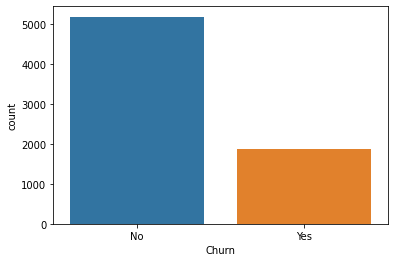

In [25]:
# visualize the count of customer churn
sns.countplot(df['Churn'])

In [26]:
# what % of customers are leaving?
num_retained = df[df.Churn == 'No'].shape[0]
num_churned = df[df.Churn == 'Yes'].shape[0]
# percentage of customers that stayed
all = (num_retained + num_churned) 
print(round(num_retained /all * 100, 2), ' % of customers had stayed with the company. ')
print(round(num_churned / all * 100, 2), ' % of customers had churned away from the company. ')

73.46  % of customers had stayed with the company. 
26.54  % of customers had churned away from the company. 


<AxesSubplot:xlabel='gender', ylabel='count'>

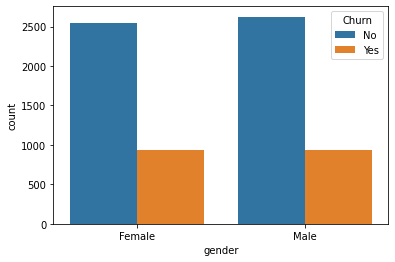

In [27]:
# Visualize churn for males and females
sns.countplot(x= 'gender', hue = 'Churn', data = df)

No distinctive difference within category/feture 'gender'. Neither males nor females bring any discernable signal as to who has more chance to churn.    

<AxesSubplot:xlabel='InternetService', ylabel='count'>

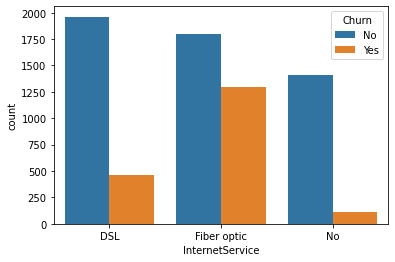

In [28]:
# Let's try 'InternetService'
sns.countplot(x='InternetService', data = df, hue='Churn')

FiberOptics Service had the most churning customers, so heads up, department of fiberoptics: either the service did not pan out to be what was advertised or it has issues/interruptions or doesn't bring value for the money, or something else... But needs to be explored further.

array([<AxesSubplot:title={'center':'tenure'}>,
       <AxesSubplot:title={'center':'MonthlyCharges'}>], dtype=object)

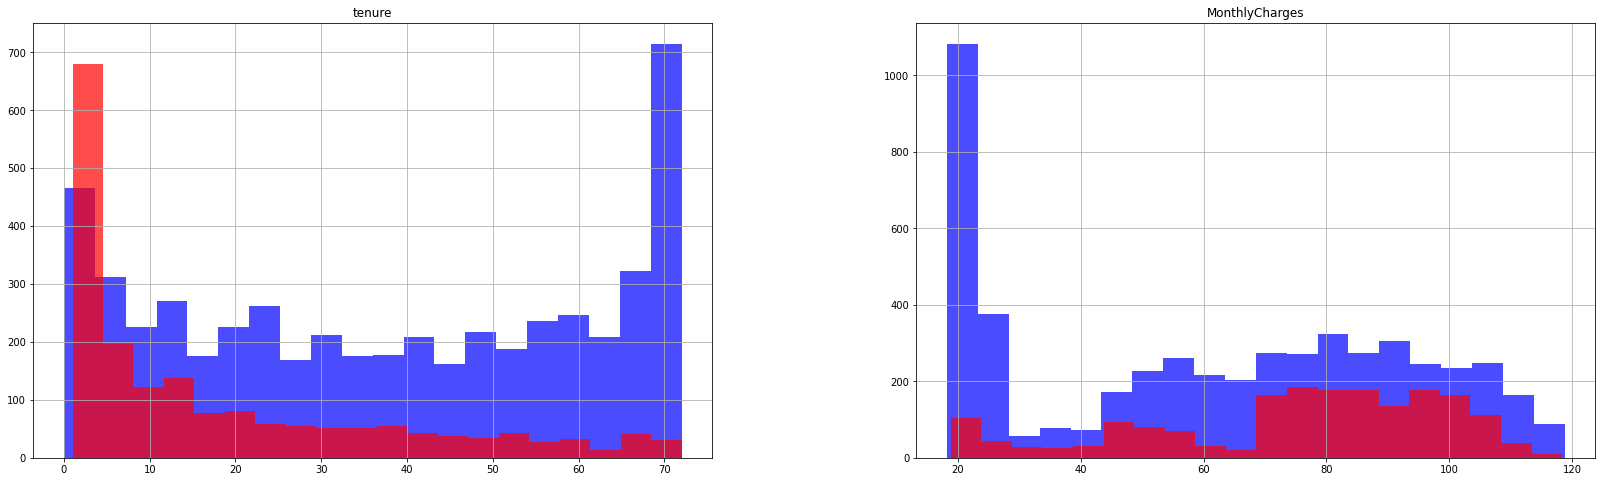

In [29]:
numerical_features = ['tenure' , 'MonthlyCharges']
fig, ax = plt.subplots(1, 2, figsize=(28,8))
df[df.Churn == 'No'][numerical_features].hist(bins= 20,color='blue', alpha=0.7, ax= ax)
df[df.Churn == 'Yes'][numerical_features].hist(bins= 20,color='red', alpha=0.7, ax= ax)

### data preprocessing

In [30]:
# remove unnecessary columns
cleaned_df = df.drop('customerID', axis=1)   

In [31]:
cleaned_df.shape

(7043, 20)

In [32]:
# Convert non-numeric columns to numeric
for c in cleaned_df.columns:
  if cleaned_df[c].dtype == np.number:
    continue
  cleaned_df[c] = LabelEncoder().fit_transform(cleaned_df[c])


<ipython-input-32-c1a3828970e2>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleaned_df[c].dtype == np.number:


In [33]:
# show converted to numeric columns
cleaned_df.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges          int64
Churn                 int64
dtype: object

In [34]:
cleaned_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


In [36]:
# Assign to main vars X,y
X = cleaned_df.drop('Churn', axis= 1) # feature dataset X
y = cleaned_df['Churn'] # dependent var y

In [38]:
#scale X, y
X = StandardScaler().fit_transform(X)


In [49]:
# Split data into 80% training & 20% testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [50]:
# create model
model = LogisticRegression()
#train the model
model.fit(x_train, y_train)


LogisticRegression()

In [45]:
# crate predictions
predictions = model.predict(x_test)
#print prediction
print(predictions)

[0 1 0 ... 1 0 0]


## Evaluation, Metrics

In [48]:
# Check prediction's precision, recall,f1-score
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1034
           1       0.63      0.54      0.58       375

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.78      0.79      0.79      1409



In [51]:
# Check prediction's precision, recall,f1-score
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76      1036
           1       0.29      0.25      0.27       373

    accuracy                           0.64      1409
   macro avg       0.52      0.52      0.52      1409
weighted avg       0.62      0.64      0.63      1409

